The dataset for this project is provided by Dr. Omar Romero-Hernandez,  Mexican academic, engineer, and researcher who currently serves as a professor at U.C. Berkeley's Haas School of Business and at the Hult International Business School.

# Objectives

The goal of this project is to perform a customer segmentation - the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Loading Dataset

In [ ]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
data.shape

(2240, 29)

# Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
median_income = data['Income'].median()
median_income

51381.5

In [ ]:
data['Income'].fillna(value=median_income, inplace=True)
data.isna().sum().sum()

0

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [ ]:
type(data['Dt_Customer'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# To get some meaningful information from Dt_Customer we will convert this column to number of days
# the customer is registered in the database, relativly to the newest input.

data['Dt_Customer'].max()

Timestamp('2014-12-06 00:00:00')

In [ ]:
data['Loyalty_Days'] = data['Dt_Customer'].max() - data['Dt_Customer']
data.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Loyalty_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,971 days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,125 days


In [ ]:
data['Year_Birth'].max()

1996

In [ ]:
# Let's transform birth year to age in 2014

data['Age'] = 2014 - data['Year_Birth']

In [ ]:
# Let's see what is inside categorical variables Education and Martial Status

data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
# It looks like there is an unnecessarily large number of categories in 'Martial_status'.
# Let's simplify it to Single/Together.

data['Marital_Status'].replace({'Married':'Together', 'Divorced':'Single', 'Widow':'Single', 'Alone':'Single',
                                'Absurd':'Single','YOLO':'Single'}, inplace=True)
data['Marital_Status'].value_counts()

Together    1444
Single       796
Name: Marital_Status, dtype: int64

In [ ]:
# Next lets sum Kidhome and Teenhome

data['Children'] = data['Kidhome'] + data['Teenhome']

In [ ]:
# We wont need some of the columns any more.

data.drop(['Dt_Customer', 'Year_Birth', 'Kidhome', 'Teenhome', 'ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [ ]:
data.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Loyalty_Days,Age,Children
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000
mean,52237.975446,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,512 days 01:02:21.428571432,45.194196,0.950446
std,25037.955891,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,232 days 05:31:02.717688372,11.984069,0.751803
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,18.000000,0.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,340 days 18:00:00,37.000000,0.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,513 days 00:00:00,44.000000,1.000000
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,685 days 06:00:00,55.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1063 days 00:00:00,121.000000,3.000000


In [ ]:
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Loyalty_Days,Age,Children
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,971 days,57,0
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,125 days,60,2
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,472 days,49,0
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,65 days,30,1
4,PhD,Together,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,321 days,33,1


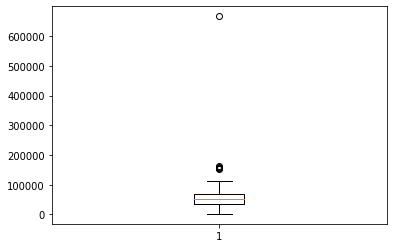

In [ ]:
# It looks like we have some outliers in Income category

plt.boxplot(data['Income'])
plt.show()

In [ ]:
# Lets drop outliers

data.drop(data[data['Income']>150000].index, axis=0, inplace=True)
data.drop(data[data['Age']>100].index, axis=0, inplace=True)

In [ ]:
# To continue simplification lets combine spending variables

data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Loyalty_Days',
       'Age', 'Children', 'Spent'],
      dtype='object')

# EDA

In [ ]:
# Where was the largest number of transactions?

deals_per_place = data[['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']].sum()
deals_per_place

NumWebPurchases         9139
NumCatalogPurchases     5877
NumStorePurchases      12956
dtype: int64

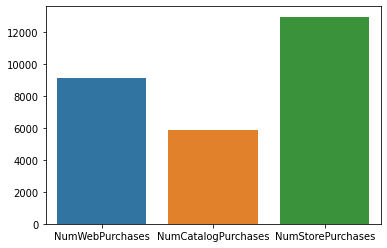

In [ ]:
sns.barplot(x=deals_per_place.index, y=deals_per_place.values)

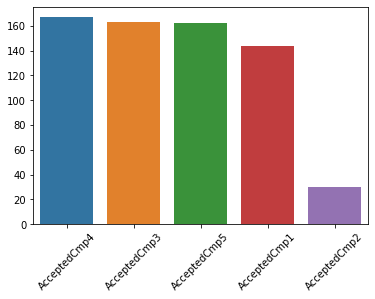

In [ ]:
# Lets take a look at campaign effectiveness.

acc_campaign = data[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum()
acc_campaign.sort_values(inplace=True, ascending=False)
sns.barplot(x=acc_campaign.index, y=acc_campaign.values)
plt.xticks(rotation=45)
plt.show()

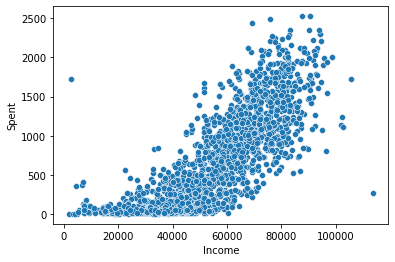

In [ ]:
# Now lets see how some characteristics of customers influence spending habits
# spending vs 'Education', 'Marital_Status', 'Income', 'Age', 'Children'

sns.scatterplot(x=data['Income'], y=data['Spent'])

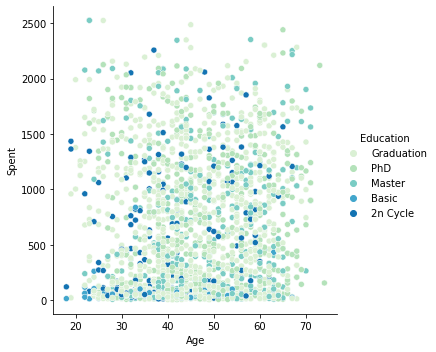

In [ ]:
sns.relplot(y=data['Spent'], x=data['Age'], hue=data['Education'], palette='GnBu')

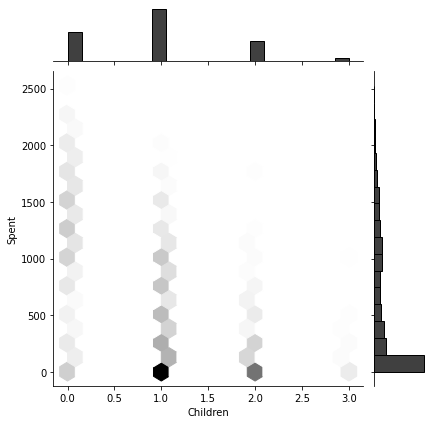

In [ ]:
sns.jointplot(x=data['Children'], y=data['Spent'], kind="hex", color="#000000")

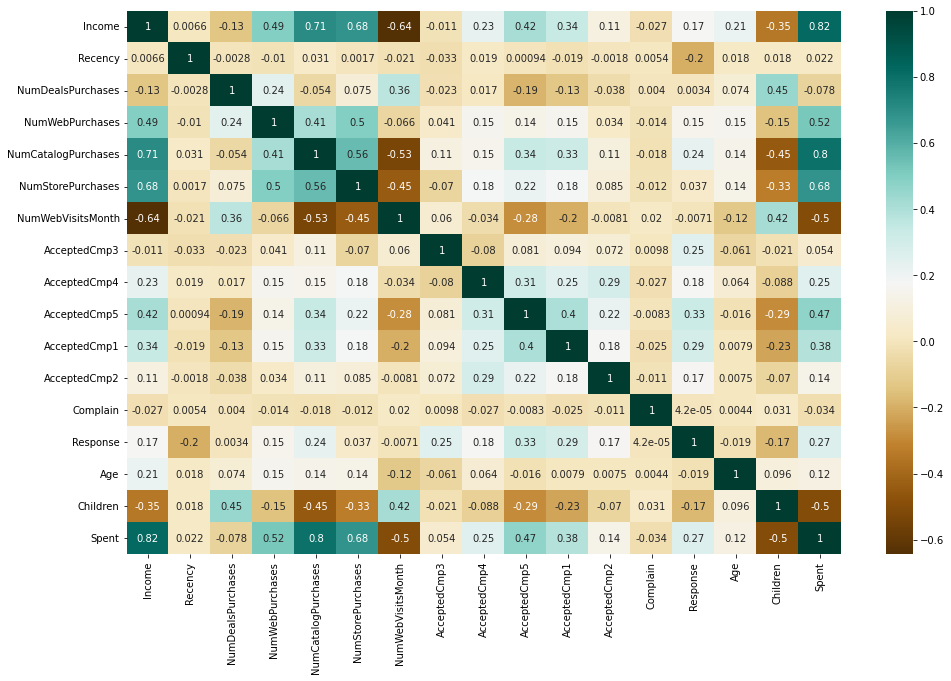

In [ ]:
# Looks like people without kids tend to spend the most (per customer)
# Let's create a correlation map to get more insights from the data
plt.figure(figsize=(16,10)) 
sns.heatmap(data.corr(), annot=True, cmap='BrBG')
plt.show()

In [ ]:
# It looks like the biggest influence for total Spent amount has Income and Number of Children (negative in second case).
# Let's choose variables to further analysis

data = data[['Income', 'Age', 'Children', 'Spent']]

# Data Preprocessing

In [ ]:
# We would like to perform a standarization of data

scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data),columns= data.columns )

data.head()

,Income,Age,Children,Spent
0,0.316484,1.015715,-1.266277,1.683247
1,-0.256135,1.272020,1.393978,-0.962795
2,0.970719,0.332234,-1.266277,0.283674
3,-1.212506,-1.291031,0.063851,-0.919526
4,0.324010,-1.034726,0.063851,-0.305445


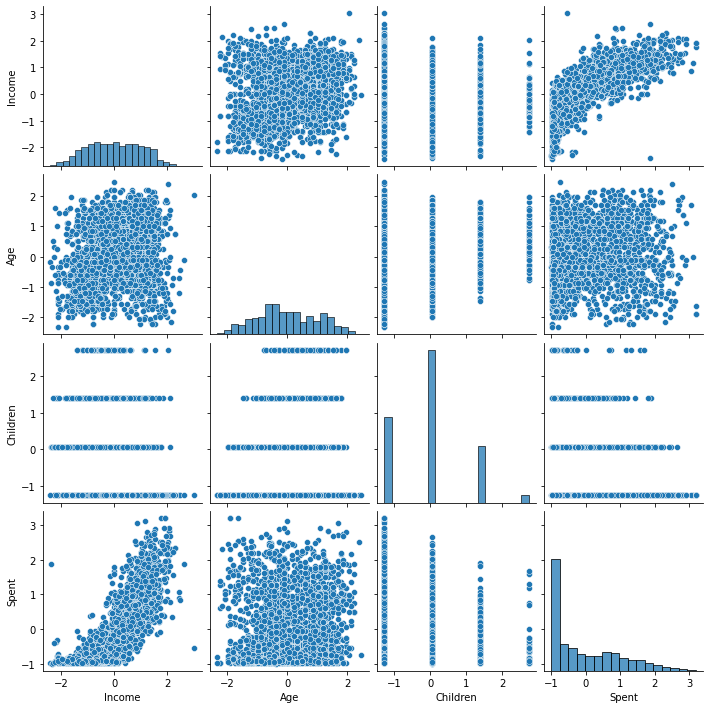

In [ ]:
sns.pairplot(data)

In [ ]:
# Elbow method to select number of clusters.

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data) 
    wcss.append(kmeans.inertia_)

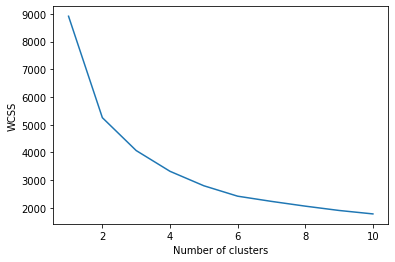

In [ ]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
# We will choose 4 as the number of clusters

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_data = kmeans.fit_predict(data)
data['Cluster'] = y_data.tolist()

In [ ]:
data.head()

,Income,Age,Children,Spent,Cluster
0,0.316484,1.015715,-1.266277,1.683247,1
1,-0.256135,1.272020,1.393978,-0.962795,0
2,0.970719,0.332234,-1.266277,0.283674,1
3,-1.212506,-1.291031,0.063851,-0.919526,2
4,0.324010,-1.034726,0.063851,-0.305445,2


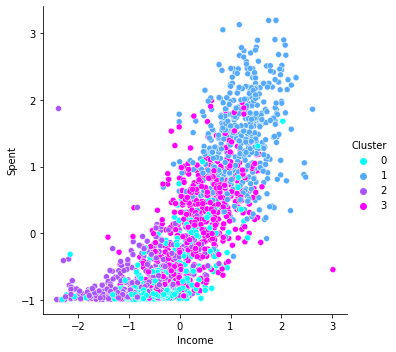

In [ ]:
sns.relplot(
    data=data,
    x="Income", y="Spent",
    hue="Cluster",
    palette='cool', sizes=(10, 200),
)

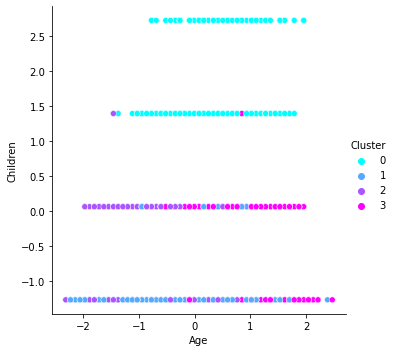

In [ ]:
sns.relplot(
    data=data,
    x="Age", y="Children",
    hue="Cluster",
    palette='cool', sizes=(10, 200),
)

In [ ]:
inversed = pd.DataFrame(scaler.inverse_transform(data.iloc[:,:4]), columns = data.iloc[:, :4].columns)
inversed['Cluster'] = data['Cluster']
inversed = inversed.astype(int)
inversed.to_csv('segmented_customers.csv')

# Summary:

Thanks to the use of the K-means++ algorithm, we managed to divide the company's clients into four categories:
1. "Families" - People with average earnings with two or three children, not spending too much,
2. "Young superstars" - High earners, spending a lot, childless, mainly young,
3. "One-kid savers" Low-earning and average-spending people, the vast majority of whom have one child,
4. "Mature supporters" Earning well and spending generously people in mature age with a maximum of one child.

The collected information can be used, for example, to create personalized advertisements for specific customer groups.